# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Naive Bayes Classifier
Week 8 | Lesson 2.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe Naive Bayes
- Choose a Naive Bayes implementation based on your use case
- Implement a Naive Bayes model through scikit-learn

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Work with methods in scikit-learn
- Conceptually explain the Bayesian posterior distribution

### A reminder of Bayes Theorem:


### $$P\left(\;A\;|\;B\;\right) = \frac{P\left(\;B\;|\;A\;\right)P\left(\;A\;\right)}{P\;(\;B\;)}$$

Or, somewhat more clearly for our uses:

### $$P\left(\;hypothesis\;|\;data\;\right) = \frac{P\left(\;data\;|\;hypothesis\;\right)P\left(\;hypothesis\;\right)}{P\;(\;data\;)} $$


- $P\;(\;hypothesis\;)$ - the probability of the hypothesis before we see any data; this is the _prior_
- $P\;(\;data\;|\;hypothesis\;)$ - the probability of the data under the hypothesis; this is the _likelihood_
- $P\;(\;hypothesis\;|\;data\;)$ - the probability of the hypothesis after we see the data; this is the _posterior_
- $P\;(\;data\;)$ - the probability of the data under any hypothesis; this is the _normalising constant_

### Applying Bayes in supervised machine learning

We can use this for classification problems; your hypothesis is hence the particular classification. Its canonical use case is text classification, where it works very well. The central difference for a Naive Bayes classification model is that it treats all predictors as conditionally independent. This makes its computation very fast, though of course not particularly realistic. For this reason it is often regarded as a base classifier against which others are judged for their ability to beat the Naive Bayes. What is surprising in the particular case of text classification is that Naive Bayes often actually outperforms models such as SVM whilst being computationally much faster too. This is hence the case where it is most often actually used in production, and in other scenarios it is more of interest in comparisons of multiple models as a baseline. 

Given X contains n boolean attributes, our formula would appear for some particular case as:

$$P(\;Y=y_i\;|\;X=x_k\;) = \frac{P(\;X=x_k\;|\;Y=Y_i\;)P(\;Y=y_i\;)}{\Sigma_j\;P(\;X=x_k\;|\;Y=Y_i\;)P(\;Y=y_i\;)}$$

It should be stated that Naive Bayes is not the only possible Bayesian classifier; one could construct a Bayesian approach that did not rest on the independence assumption but this would be computationally intractable. Critically, given independence then our probability across all $X$ given $Y$ becomes a product for each $X_i$

 $$P(\;X_1...X_n\;|\;Y\;) = \prod_i P(\;X_i\;|\;Y\;) $$

Such that the fundamental equation for the Naive Bayes classifier becomes:
### $$P(\;Y=y_k\;|\;X_1...X_n\;) = \frac{P(\;Y=y_k\;) \prod_i P(\;X_i\;|\;Y=Y_k\;)}{\Sigma_j\;P(\;Y=y_j\;) \prod_i P(\;X_i\;|\;Y=y_j\;)}$$

Given some new unseen instance $X\;=\;<X_1...X_n>$, this equation shows us how to calculate the probability that $Y$ will take on the given value $Y\;=\;y_k$. In particular, we can simplify even further to return the most probable value of $Y$:

### $$Y \leftarrow argmax\; P(\;Y=y_k\;) \prod_i P(\;X_i\;|\;Y=Y_k\;) $$

We can estimate parameters with maximum likelihood by taking relative frequency counts for each case in the training dataset.

### Moving toward a production implementation

Possible issues to contend with:

- [Underflow](http://stackoverflow.com/questions/3704570/in-python-small-floats-tending-to-zero). Probabilites may very very small, too small for floating point arithmetic. We can solve by leveraging:

$$log(ab) = log\ a + log\ b$$

$$exp(log\ x) = x$$

So $P_1\ *\ P_2\ ...\ *\ P_2 = exp(log\ P_1 + ... + log\ P_n)$


- '0' probabilities. What if you never saw a feature value in your training data? We can use smoothing:

$$\hat\theta_i= \frac{x_i + \alpha}{N + \alpha d}  \qquad (i=1,\ldots,d)$$

- Continuous features. This brings us to *distributions*.

### The likelihood functions

Bayesians tend to talk in terms of distributions of belief. Rather than point estimates of probabilities, we can use distributions.

- For a binary event, probability can be modeled with the **binomial distribution**.
- For > 2 discrete outcomes, the **multinomial distribution**.
- And if features are continuous? **Gaussian**.

In sklearn the Naive Bayes classifier has those three variants (Binomial/Bernoulli, Multinomial, Normal/Gaussian).

- [sklearn BernouilliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
- [sklearn MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
- [sklearn GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [3]:
import numpy as np
import pandas as pd
from __future__ import division, print_function

## Simple Naive Bayes Example: mobile customer conversion

In [4]:
# Simple case Naive Bayes
# Bernoulli case of variables (binary)

frequency_table=pd.DataFrame(data=[[400,100,350,150,450,50], [0,300,150,150,300,0], [100,100,150,50,50,150]], 
                            columns=["phone_iOS_1", "phone_iOS_0", "location_uk_1", "location_uk_0", "login_facebook_1", "login_facebook_0"],
                            index=[["purchase_premium","purchase_standard","free_trial"]])
frequency_table

,phone_iOS_1,phone_iOS_0,location_uk_1,location_uk_0,login_facebook_1,login_facebook_0
purchase_premium,400,100,350,150,450,50
purchase_standard,0,300,150,150,300,0
free_trial,100,100,150,50,50,150


In [238]:
# Optional: because of the zeroes we can add 1 to every case to smooth it
#frequency_table=frequency_table+1
#frequency_table

In [5]:
# What are the priors?

P_premium=np.sum(frequency_table.loc["purchase_premium", ["phone_iOS_1", "phone_iOS_0"]])/(np.sum(frequency_table.loc[:, "phone_iOS_1"])+np.sum(frequency_table.loc[:, "phone_iOS_0"]))
P_standard=np.sum(frequency_table.loc["purchase_standard", ["phone_iOS_1", "phone_iOS_0"]])/(np.sum(frequency_table.loc[:, "phone_iOS_1"])+np.sum(frequency_table.loc[:, "phone_iOS_0"]))
P_free=np.sum(frequency_table.loc["free_trial", ["phone_iOS_1", "phone_iOS_0"]])/(np.sum(frequency_table.loc[:, "phone_iOS_1"])+np.sum(frequency_table.loc[:, "phone_iOS_0"]))
print(P_premium)
print(P_standard)
print(P_free)

0.5
0.3
0.2


In [6]:
# What are the likelihoods?

P_ios_given_premium=np.sum(frequency_table.loc["purchase_premium", ["phone_iOS_1"]])/np.sum(frequency_table.loc["purchase_premium", ["phone_iOS_1", "phone_iOS_0"]])
P_uk_given_premium=np.sum(frequency_table.loc["purchase_premium", ["location_uk_1"]])/np.sum(frequency_table.loc["purchase_premium", ["location_uk_1", "location_uk_0"]])
P_fb_given_premium=np.sum(frequency_table.loc["purchase_premium", ["login_facebook_1"]])/np.sum(frequency_table.loc["purchase_premium", ["login_facebook_1", "login_facebook_0"]])
P_ios_given_standard=np.sum(frequency_table.loc["purchase_standard", ["phone_iOS_1"]])/np.sum(frequency_table.loc["purchase_standard", ["phone_iOS_1", "phone_iOS_0"]])
P_uk_given_standard=np.sum(frequency_table.loc["purchase_standard", ["location_uk_1"]])/np.sum(frequency_table.loc["purchase_standard", ["location_uk_1", "location_uk_0"]])
P_fb_given_standard=np.sum(frequency_table.loc["purchase_standard", ["login_facebook_1"]])/np.sum(frequency_table.loc["purchase_standard", ["login_facebook_1", "login_facebook_0"]])
P_ios_given_free=np.sum(frequency_table.loc["free_trial", ["phone_iOS_1"]])/np.sum(frequency_table.loc["free_trial", ["phone_iOS_1", "phone_iOS_0"]])
P_uk_given_free=np.sum(frequency_table.loc["free_trial", ["location_uk_1"]])/np.sum(frequency_table.loc["free_trial", ["location_uk_1", "location_uk_0"]])
P_fb_given_free=np.sum(frequency_table.loc["free_trial", ["login_facebook_1"]])/np.sum(frequency_table.loc["free_trial", ["login_facebook_1", "login_facebook_0"]])

print(P_ios_given_premium)
print(P_uk_given_premium)
print(P_fb_given_premium)

0.8
0.7
0.9


In [7]:
# What are the normalising constants? Also called the probability of the data
# In general we do not need to calculate these
# I just show you that in this particular case it is 

P_iOS=np.sum(frequency_table.loc[:, "phone_iOS_1"])/(np.sum(frequency_table.loc[:, "phone_iOS_1"])+np.sum(frequency_table.loc[:, "phone_iOS_0"]))
P_uk=np.sum(frequency_table.loc[:, "location_uk_1"])/(np.sum(frequency_table.loc[:, "location_uk_1"])+np.sum(frequency_table.loc[:, "location_uk_0"]))
P_fb=np.sum(frequency_table.loc[:, "login_facebook_1"])/(np.sum(frequency_table.loc[:, "login_facebook_1"])+np.sum(frequency_table.loc[:, "login_facebook_0"]))
print(P_iOS)
print(P_uk)
print(P_fb)

0.5
0.65
0.8


In [8]:
# So given the three predictors, which class is the customer most likely to sign up to?
# Let's say the customer is 1 to all three

P_premium_given_ios_uk_fb=P_ios_given_premium * P_uk_given_premium * P_fb_given_premium * P_premium
P_standard_given_ios_uk_fb=P_ios_given_standard * P_uk_given_standard * P_fb_given_standard * P_standard
P_free_given_ios_uk_fb=P_ios_given_free * P_uk_given_free * P_fb_given_free * P_free
print(P_premium_given_ios_uk_fb)
print(P_standard_given_ios_uk_fb)
print(P_free_given_ios_uk_fb)

0.252
0.0
0.01875


In [9]:
# We can normalise the probabilities by summing them to 1 since they are
# mutually exclusive and collectively exhaustive
# We could also use the normalising constants to do this

P_premium_given_ios_uk_fb_normalised=P_premium_given_ios_uk_fb/(P_premium_given_ios_uk_fb+P_standard_given_ios_uk_fb+P_free_given_ios_uk_fb)
P_standard_given_ios_uk_fb_normalised=P_standard_given_ios_uk_fb/(P_premium_given_ios_uk_fb+P_standard_given_ios_uk_fb+P_free_given_ios_uk_fb)
P_free_given_ios_uk_fb_normalised=P_free_given_ios_uk_fb/(P_premium_given_ios_uk_fb+P_standard_given_ios_uk_fb+P_free_given_ios_uk_fb)
print(P_premium_given_ios_uk_fb_normalised)
print(P_standard_given_ios_uk_fb_normalised)
print(P_free_given_ios_uk_fb_normalised)

0.930747922438
0.0
0.0692520775623


In [ ]:
# For the sklearn implementation, it expects an instance of every customer
# rather than an aggregated summary such as the above, which is the easiest
# to understand as the binary case. We will have to recreate our data not as a summary
# but as a full table with every example case to be input

## Simple Naive Bayes Example: mobile customer conversion again - in sklearn

In [10]:
frequency_table

,phone_iOS_1,phone_iOS_0,location_uk_1,location_uk_0,login_facebook_1,login_facebook_0
purchase_premium,400,100,350,150,450,50
purchase_standard,0,300,150,150,300,0
free_trial,100,100,150,50,50,150


In [11]:
# This is how I recreated the data, this results in a count of instances the same as the above 
# summary table gave us in a format that sklearn expects (each row being one customer)
# y is the outcome with 1 = premium, 2 = standard, 3 = free

X=pd.DataFrame(data={"phone_ios": np.ravel([[1]*400 + [0]*100 + [0]*300 + [1]*100 + [0]*100]), 
                     "location_uk": np.ravel([[1]*350 + [0]*150 + [1]*150 + [0]*150 + [1]*150 + [0]*50]),
                     "login_facebook": np.ravel([[1]*450 + [0]*50 + [1]*300 + [1]*50 + [0]*150])})
y=np.concatenate([np.ones(500), 2*np.ones(300), 3*np.ones(200)])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train on Bernoulli Naive Bayes, because all predictor values are binary
from sklearn import naive_bayes
nb=naive_bayes.BernoulliNB()
nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [18]:
# Going back to that one example we tested previously where all three predictors = 1

print("predicted category for iOS = 1 , uk = 1 , fb = 1 :")
print(nb.predict(np.array([1,1,1]).reshape(1,-1)))
print("(note that 1 = premium, 2 = standard, 3 = free)")
print("With predicted probabilities (remember these are less reliable than other classifiers):")
print(nb.predict_proba(np.array([1,1,1]).reshape(1,-1)))

predicted category for iOS = 1 , uk = 1 , fb = 1 :
[ 1.]
(note that 1 = premium, 2 = standard, 3 = free)
With predicted probabilities (remember these are less reliable than other classifiers):
[[ 0.93216829  0.00230087  0.06553084]]


In [21]:
# General performance on test set for classification
from sklearn.metrics import accuracy_score,confusion_matrix
predictions=nb.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))

0.86
[[81  0 13]
 [ 8 60  0]
 [ 7  0 31]]


## Guided practice: Scikit-learn

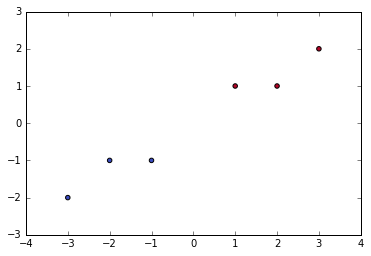

In [23]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import data into a numpy array
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

plt.scatter(X[:,0], X[:,1], c=Y, cmap='coolwarm')
plt.show()

In [26]:
#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the data
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()

# Predict a few instances
print(clf.predict([[-0.8, -1]]))
print(clf.predict([[2, 1]]))

# You could try plotting the decision boundary

[1]
[2]


In [27]:
# Naive-Bayes classifier with SPAM (this data has already been processed)
# and vectorized to numbered features

from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

spam_data = pd.read_csv('./assets/datasets/spam_base.csv', header=None)
spam_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [28]:
X=spam_data.loc[:,0:53]
y=spam_data.loc[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
nb=naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predictions=nb.predict(X_test)

In [30]:
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))

0.883821932682
[[443  19]
 [ 88 371]]


## Conclusion

How does Naive Bayes fit into your toolkit? What are the pros and cons? How do you choose between variants?
